In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-competition/dataset/sample_submission.csv
/kaggle/input/amex-competition/dataset/train.csv
/kaggle/input/amex-competition/dataset/test.csv


In [2]:
 pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels
import re

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [6]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

In [7]:
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string

In [8]:
!pip install scorecardpy
import scorecardpy as sc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60634 sha256=a83d738cee447d676d67a8c9fb45f818e803601b2aac9258bd82990719ad8b8d
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


In [9]:
import mlxtend

In [10]:
pd.set_option('display.max_columns', None)  

In [11]:
pd.set_option('display.max_colwidth', None)

In [12]:
path = '../input/amex-competition/dataset/train.csv'
train = pd.read_csv(path)
train

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


# **Data Description**

In [13]:
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [14]:
train['credit_card_default'].value_counts(normalize=True)
#tần suất xuất hiện của mỗi giá trị trong cột credit_card_default nhưng hiển thị dưới dạng %

credit_card_default
0    0.918797
1    0.081203
Name: proportion, dtype: float64

In [15]:
#chọn ngẫu nhiên tập hợp mẫu con gồm 30000 rows từ tập dữ liệu lớn
#nhằm giảm kích thước của dữ liệu để tăng tốc độ tính toán hoặc giảm độ phức tạp của mô hình
df = train.sample(n=30000, random_state=42, replace=False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# **Exploratory Data Analysis**

In [16]:
#check size dataset
print(df.shape)

(30000, 19)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

## 1. Categorical features:

In [18]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [19]:
# def plot_categorical_bar_vertical(data, column_name, figsize=(18, 8), 
#                                   percentage_display=True, plot_defaulter=True, rotation=0, 
#                                   horizontal_adjust=0.25, fontsize_percent='xx-small'):
#     '''
#     Function to plot Categorical Variables Bar Plots

#     Parameters:
#         data: DataFrame
#             The DataFrame from which to plot
#         column_name: str
#             Column's name whose distribution is to be plotted
#         figsize: tuple, default=(18,6)
#             Size of the figure to be plotted
#         percentage_display: bool, default=True
#             Whether to display the percentages on top of Bars in Bar-Plot
#         plot_defaulter: bool
#             Whether to plot the Bar Plots for Defaulters or not
#         rotation: int, default=0
#             Degree of rotation for x-tick labels
#         horizontal_adjust: int, default=0
#             Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
#         fontsize_percent: str, default='xx-small'
#             Fontsize for percentage Display
#     '''

#     print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")

#     plt.figure(figsize=figsize, tight_layout=False)
#     sns.set(style='whitegrid', font_scale=1.2)
#     custom_palette = ['#eb0524', '#B4B4B3']

#     # Plotting overall distribution of category
#     plt.subplot(1, 2, 1)
#     data_to_plot = data[column_name].value_counts().sort_values(ascending=False)
#     ax1 = sns.barplot(x=data_to_plot.index, y=data_to_plot, palette=sns.color_palette('Paired'), orient='v')

#     if percentage_display:
#         total_datapoints = len(data[column_name].dropna())
#         for p in ax1.patches:
#             ax1.text(p.get_x() + p.get_width() / 2,
#                      p.get_height() + horizontal_adjust + 4000,
#                      '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints),
#                      fontsize=fontsize_percent,
#                      ha='center')

#     # remove spines
#     ax1.spines[['right', 'left', 'top']].set_visible(False)  # Xoá spines
#     ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotation)
#     ax1.yaxis.set_major_formatter(FuncFormatter(format_thousands))

#     plt.title(f'Distribution of {column_name}', pad=20)
#     plt.ylabel('')
#     plt.xlabel(column_name)

#     # Plotting distribution of category for Defaulters
#     if plot_defaulter:
#         percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending=False)

#         plt.subplot(1, 2, 2)
#         ax2 = sns.barplot(x=percentage_defaulter_per_category.index, y=percentage_defaulter_per_category, palette=sns.color_palette('Paired'), orient='v')  # Thay đổi orient thành 'v'
#         plt.ylabel('Percentage of Defaulter per category')
#         plt.xlabel(column_name)
#         plt.title(f'Percentage of Defaulters for each category of {column_name}', pad=20)

#         # Annotate for ax2
#         for p in ax2.patches:
#             ax2.text(p.get_x() + p.get_width() / 2, p.get_height() + horizontal_adjust, '{:.2f}%'.format(p.get_height()), fontsize=fontsize_percent, ha='center')

#         # remove spines
#         ax2.spines[['right', 'left', 'top']].set_visible(False)  # Xoá spines
#         ax2.set_xticklabels(ax2.get_xticklabels(), rotation=rotation)

#     plt.show()

In [20]:
# plot_categorical_bar_vertical(df, 'owns_house')

## 2. Numerical features:

In [21]:
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [22]:
df.duplicated().sum()

0

## 3. Check target variable 'credit_card_default'

In [23]:
def plot_distribution(data, column):

    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    colors = ['#dc143c', '#c4c4c4']

    # Pie chart
    labels = data[column].value_counts().index
    vals = data[column].value_counts().values

    ax[0].pie(vals,
              explode=[0, 0.2],
              labels=labels,
              colors=colors,
              autopct='%.2f%%',
              shadow=False,
              wedgeprops=dict(edgecolor='black'))

    # Chỉnh lại size của annotate
    for text in ax[0].texts:
        text.set_fontsize(12)

    ax[0].set_ylabel('')

    # Countplot
    bars = ax[1].bar(labels,
                    vals,
                    color=colors,
                    edgecolor='black')

    ax[1].set_xticks([0.00, 1.00])
    ax[1].set_yticks([])  # Xoá ytick
    ax[1].spines[['right', 'left', 'top']].set_visible(False)  # Xoá spine bên phải

    for bar in bars:
        count = bar.get_height()
        formatted_count = '{:,.0f}'.format(count)
        ax[1].annotate(f'{formatted_count}',
                       xy=(bar.get_x() + bar.get_width() / 2, count),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=12, color='black')

    # Chỉnh size của xtick
    ax[0].tick_params(axis='x', labelsize=16)
    ax[1].tick_params(axis='x', labelsize=16)

    # Chỉnh khoảng cách giữa 2 ax
    plt.subplots_adjust(wspace=0.8)

    # Show the plot
    plt.suptitle(f'The Distribution of {column} value', fontsize=25, fontweight='bold', color='black')

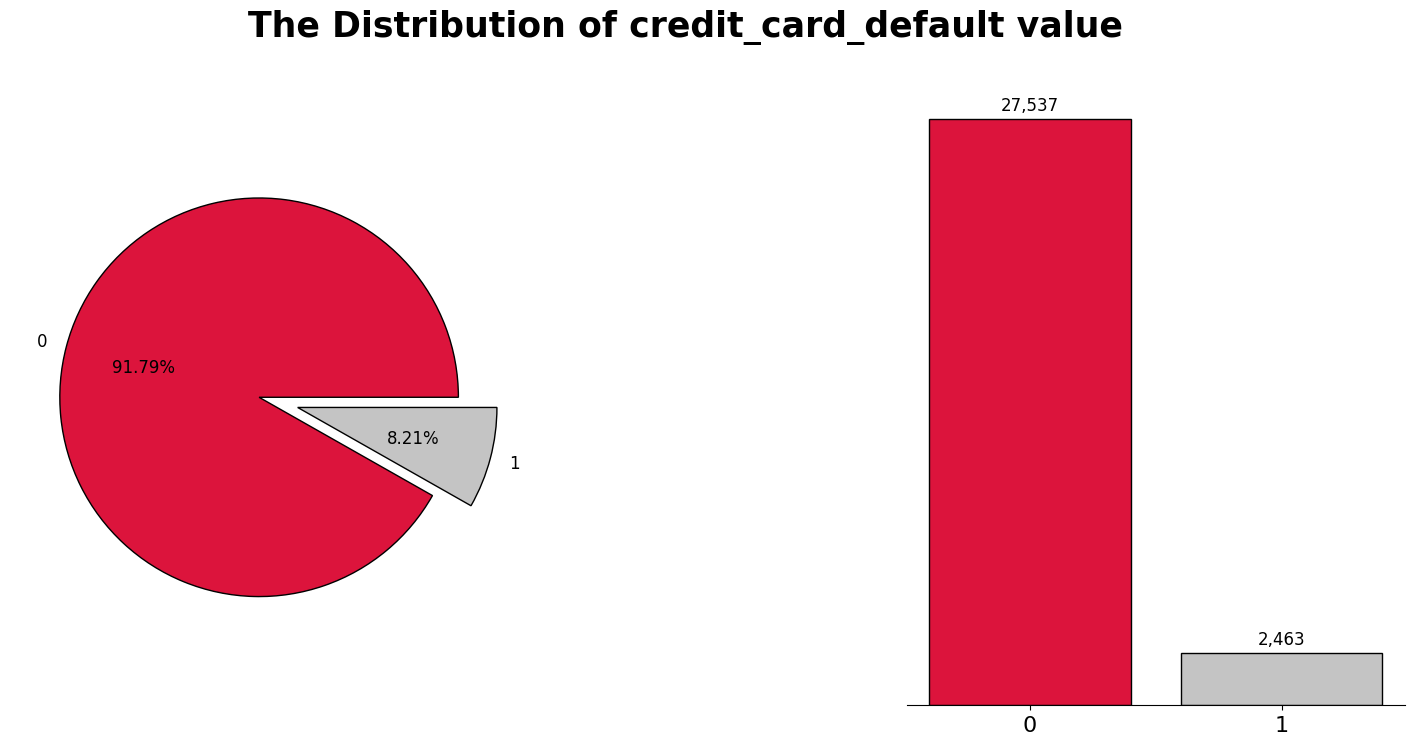

In [24]:
plot_distribution(df, 'credit_card_default')

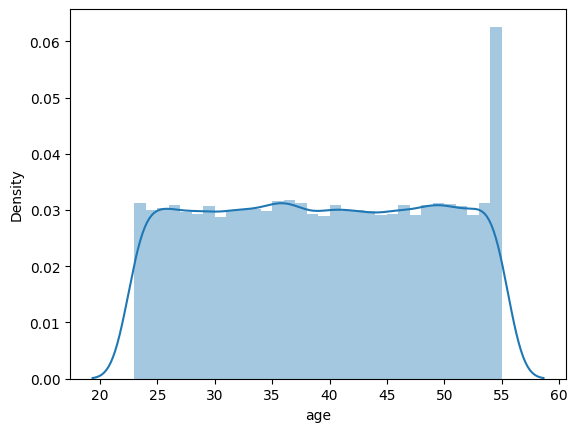

In [25]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

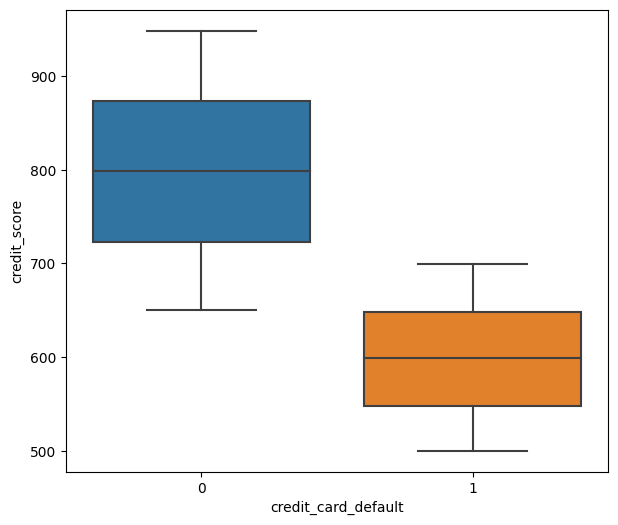

In [26]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(x=df['credit_card_default'], y=df['credit_score'])
plt.show()

Từ biểu đồ, chúng ta có thể thấy rằng nhóm không vỡ nợ (trạng thái 0) có phân phối điểm tín dụng trung bình cao hơn so với nhóm vỡ nợ (trạng thái 1), có vẻ như nhóm không vỡ nợ có xu hướng có điểm tín dụng cao hơn - điều này là hiển nhiên ><

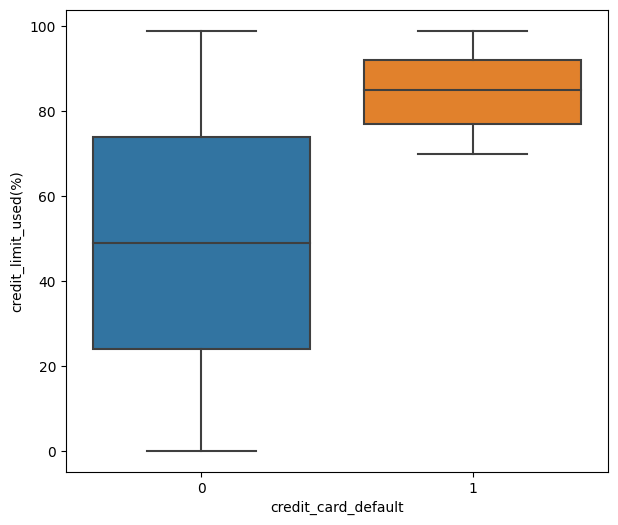

In [27]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(x=df['credit_card_default'], y=df['credit_limit_used(%)'])
plt.show()

Biểu đồ boxplot này biểu thị phân phối của tỷ lệ sử dụng hạn mức tín dụng - credit_limit_used(%) dựa trên biến target:
- Nhóm 0 có phân phối tỷ lệ sử dụng hạn mức tín dụng tương đối đồng đều, với median ở mức giữa khoảng 40-60%.
- Nhóm 1 có phân phối tỷ lệ sử dụng hạn mức tín dụng tương đối cao hơn, với median nằm trong khoảng 80-100%
Có thể xem xét, đây là 1 yếu tố quan trọng để dự đoán khả năng vỡ nợ, và biểu đồ boxplot này cho thấy sự khác biệt trong phân phối của tỷ lệ sử dụng hạn mức tín dụng giữa hai nhóm này.

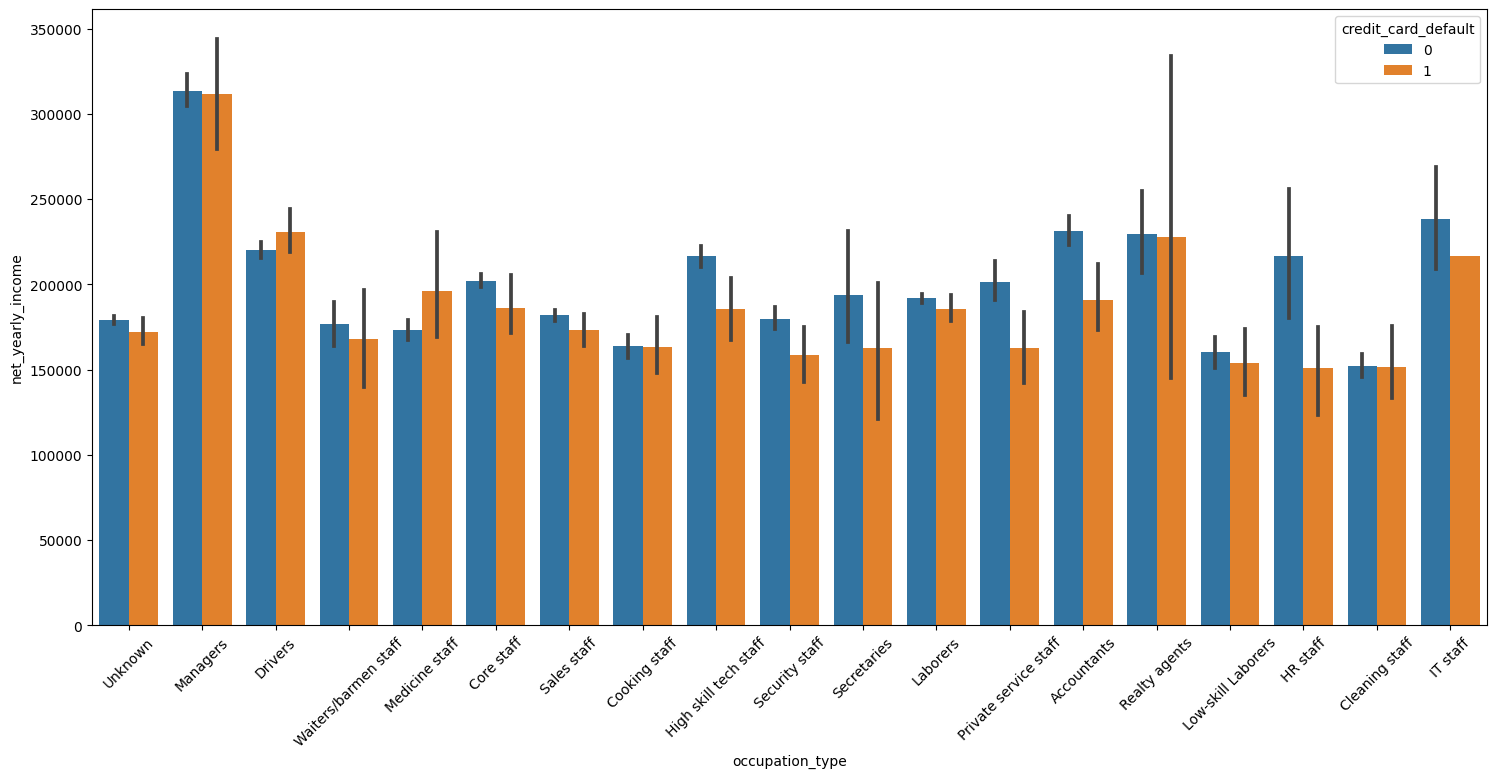

In [28]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

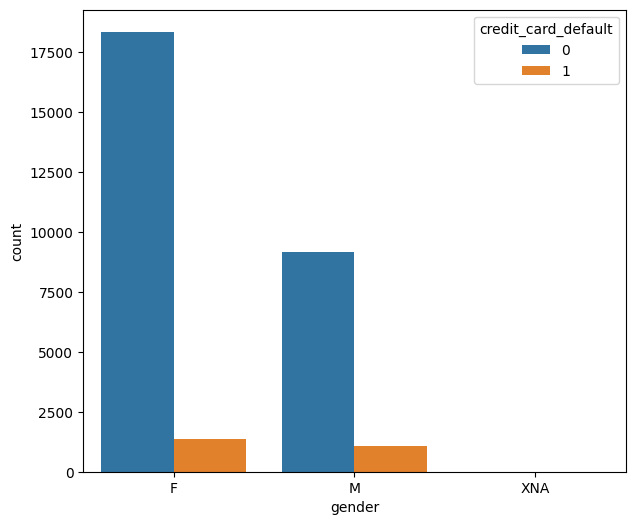

In [29]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(x=df['gender'], hue=df['credit_card_default'])
plt.show()

In [30]:
df['gender'].value_counts()

gender
F      19731
M      10268
XNA        1
Name: count, dtype: int64

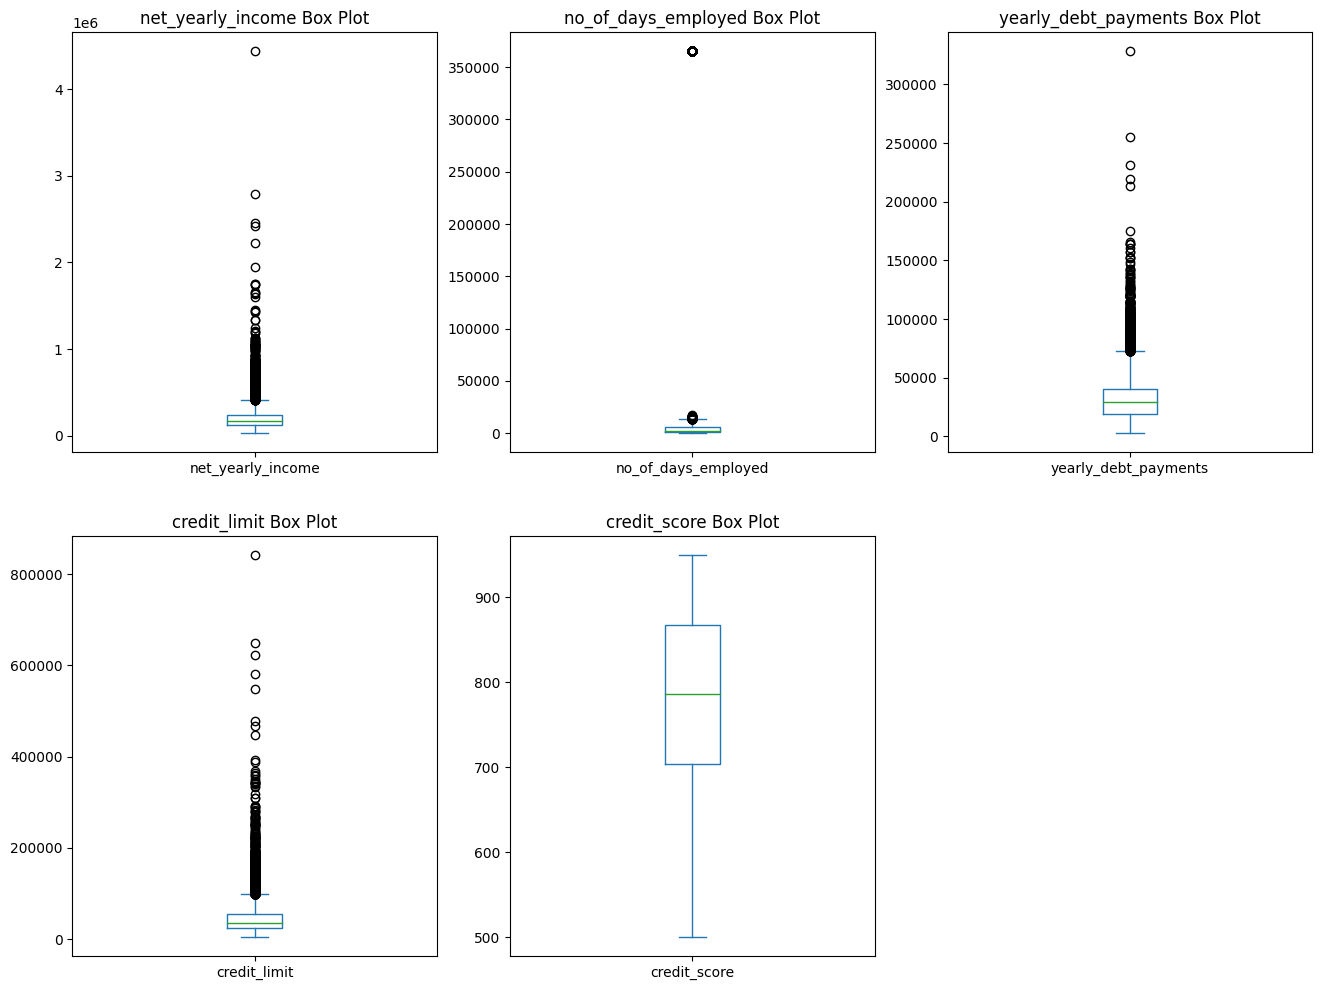

In [31]:
# boxplot of all continuous variables
plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

# **Data Processing**

## 1. Missing values handling

In [32]:
def missing_values_table(df):

    """Function to calculate missing values by column."""

    # Total missing values
    miss_val = df.isnull().sum()

    # Percentage of missing values
    miss_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)

    # Rename the columns
    miss_val_table_ren_columns = miss_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    miss_val_table_ren_columns = miss_val_table_ren_columns[
        miss_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
           "There are " + str(miss_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    # Return the dataframe with missing information
    return miss_val_table_ren_columns

In [33]:
missing_values_table(df)

Your selected dataframe has 19 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
no_of_children,502,1.7
owns_car,369,1.2
no_of_days_employed,315,1.0
yearly_debt_payments,62,0.2
total_family_members,56,0.2
migrant_worker,53,0.2
credit_score,6,0.0


In [34]:
df[cat_feats].isnull().sum()

customer_id          0
name                 0
gender               0
owns_car           369
owns_house           0
occupation_type      0
dtype: int64

In [35]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: proportion, Length: 3514, dtype: float64


Column Name: gender
gender
F      0.657700
M      0.342267
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.660862
Y    0.339138
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6962
N    0.3038
Name: 

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way. That is, FillNA by MODE if it is categorical variable and FillNA by MEAN if it is numerical variable:
- by MODE: điền giá trị phổ biến nhất 
- by MEAN/MEDIAN: điền giá trị trung bình/trung vị (combine cả 2)

### a. Cat feats

In [36]:
#GENDER
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [37]:
#change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

gender
F    19731
M    10269
Name: count, dtype: int64

In [38]:
#OWNS CAR
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

In [39]:
df["owns_car"].value_counts(normalize=True)

owns_car
N    0.665033
Y    0.334967
Name: proportion, dtype: float64

In [40]:
#check isnull for Categorical features
df[cat_feats].isnull().sum()

customer_id        0
name               0
gender             0
owns_car           0
owns_house         0
occupation_type    0
dtype: int64

### b. Num feats

In [41]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

no_of_children          502
no_of_days_employed     315
yearly_debt_payments     62
total_family_members     56
migrant_worker           53
credit_score              6
age                       0
net_yearly_income         0
credit_limit              0
credit_limit_used(%)      0
dtype: int64

In [42]:
# no_of_children - fill no_of_children with MODE of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

In [43]:
# no_of_days_employed
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [44]:
df.no_of_days_employed.isna().sum()

0

In [45]:
# yearly_debt_payments
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [46]:
df['yearly_debt_payments'].isna().sum()

0

In [47]:
# migrant_worker
df['migrant_worker'].mode()

0    0.0
Name: migrant_worker, dtype: float64

In [48]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

0

In [49]:
# total_family_members
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

0

In [50]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

credit_score           6
age                    0
no_of_children         0
net_yearly_income      0
no_of_days_employed    0
dtype: int64

In [51]:
# credit_score

# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

0

In [52]:
df[num_feats].isnull().sum().sort_values(ascending = False)

age                        0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [53]:
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

## 2. Selection Variables
> Drop columns which have IV < 0.02

In [54]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        # bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        bins = notmiss.X.quantile(np.linspace(0, 1, n)).values
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df._append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [55]:
final_iv, IV = data_vars(df.drop(columns =["customer_id", "name", 'credit_card_default']), df["credit_card_default"])

In [56]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,23,39,15426,1268,0.082199,14158,0.917801,0.514819,0.514145,0.001311,0.000002
1,age,40,55,14574,1195,0.081995,13379,0.918005,0.485181,0.485855,-0.001390,0.000002
2,gender,F,F,19731,1378,0.069839,18353,0.930161,0.559480,0.666485,-0.175009,0.048503
3,gender,M,M,10269,1085,0.105658,9184,0.894342,0.440520,0.333515,0.278268,0.048503
4,owns_car,N,N,19951,1709,0.085660,18242,0.914340,0.693869,0.662454,0.046332,0.004524
5,owns_car,Y,Y,10049,754,0.075032,9295,0.924968,0.306131,0.337546,-0.097689,0.004524
6,owns_house,N,N,9114,757,0.083059,8357,0.916941,0.307349,0.303483,0.012659,0.000070
7,owns_house,Y,Y,20886,1706,0.081682,19180,0.918318,0.692651,0.696517,-0.005566,0.000070
8,no_of_children,0.0,1.0,27010,2196,0.081303,24814,0.918697,0.891596,0.901115,-0.010620,0.000976
9,no_of_children,2.0,9.0,2990,267,0.089298,2723,0.910702,0.108404,0.098885,0.091910,0.000976


In [57]:
IV.sort_values('IV')

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [58]:
IV.sort_values('IV', ascending=True).head(10)

,VAR_NAME,IV
0,age,0.000002
12,owns_house,0.000070
15,yearly_debt_payments,0.000080
1,credit_limit,0.000470
8,no_of_children,0.000976
14,total_family_members,0.002461
7,net_yearly_income,0.003464
11,owns_car,0.004524
13,prev_defaults,0.006260
6,migrant_worker,0.012561


In [59]:
IV.sort_values('IV', ascending=True).head(10)["VAR_NAME"].values

array(['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
       'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker'], dtype=object)

> We will drop some low(<0.02) IV columns

In [60]:
low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
      'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker']

## 3. WOE binning

[INFO] creating woe binning ...


{'credit_limit': <Figure size 640x480 with 2 Axes>,
 'prev_defaults': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'occupation_type': <Figure size 640x480 with 2 Axes>,
 'total_family_members': <Figure size 640x480 with 2 Axes>,
 'credit_score': <Figure size 640x480 with 2 Axes>,
 'gender': <Figure size 640x480 with 2 Axes>,
 'no_of_days_employed': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'no_of_children': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'default_in_last_6months': <Figure size 640x480 with 2 Axes>,
 'owns_house': <Figure size 640x480 with 2 Axes>}

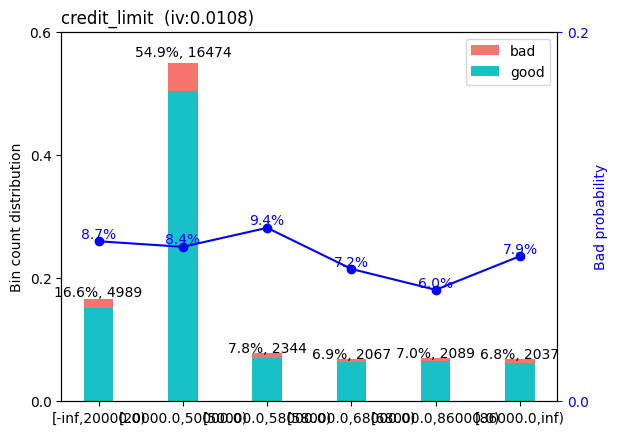

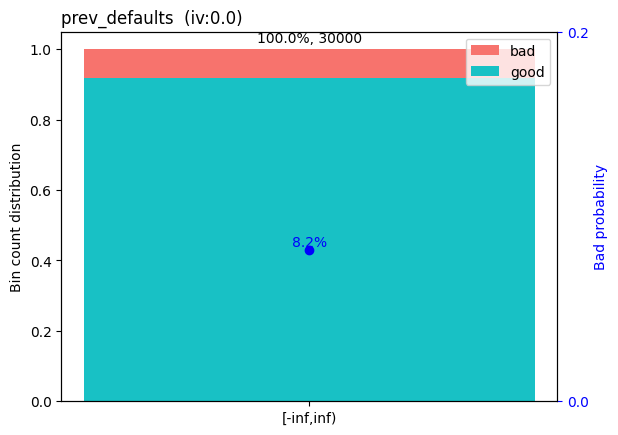

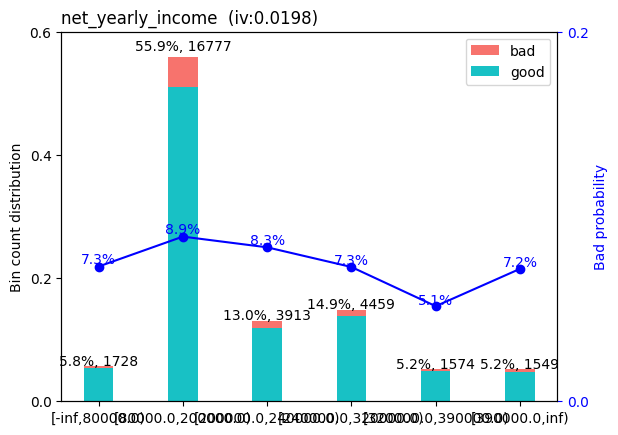

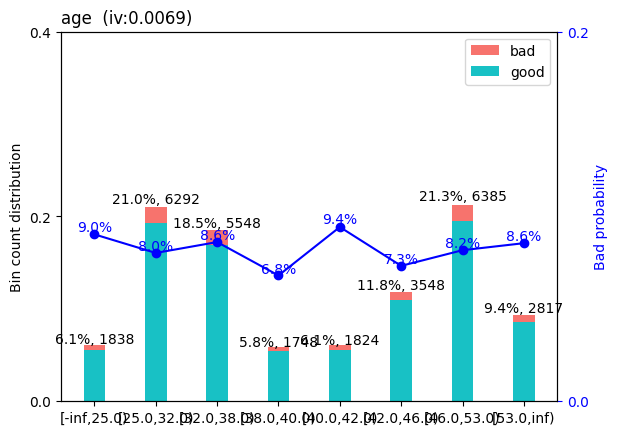

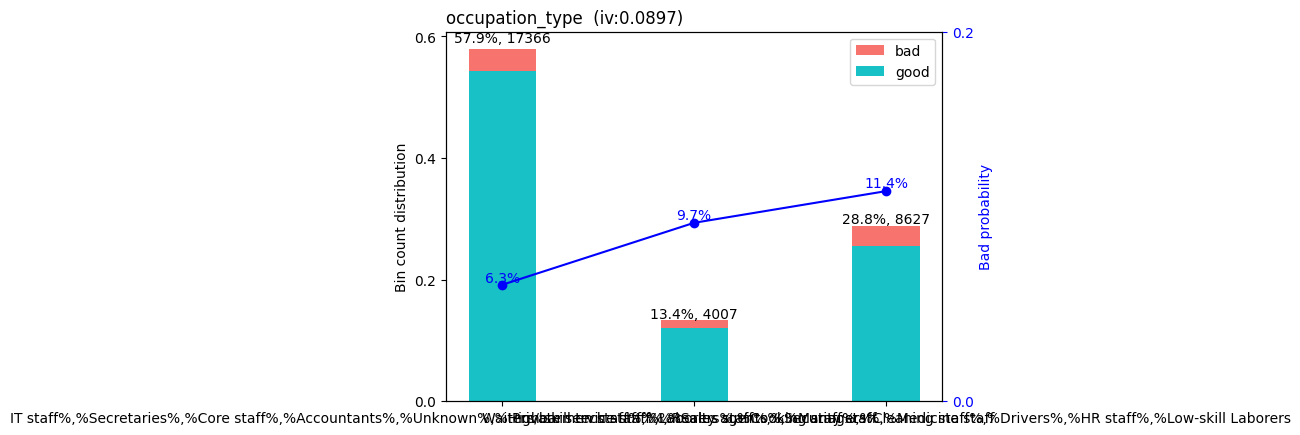

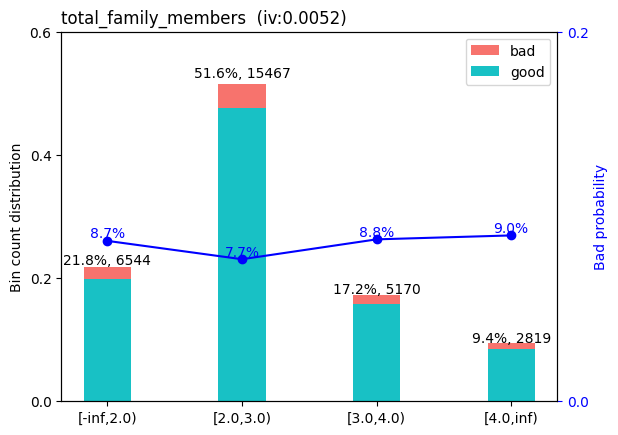

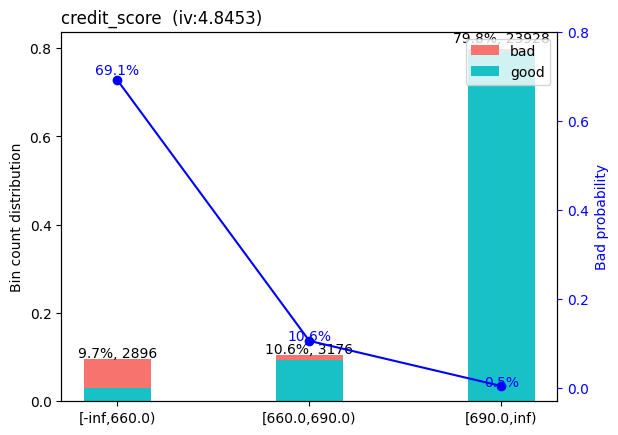

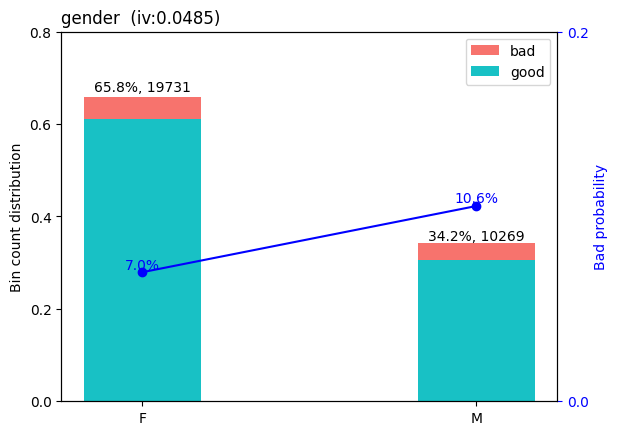

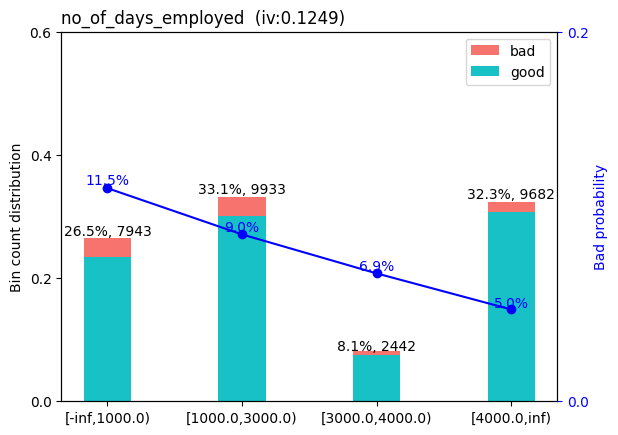

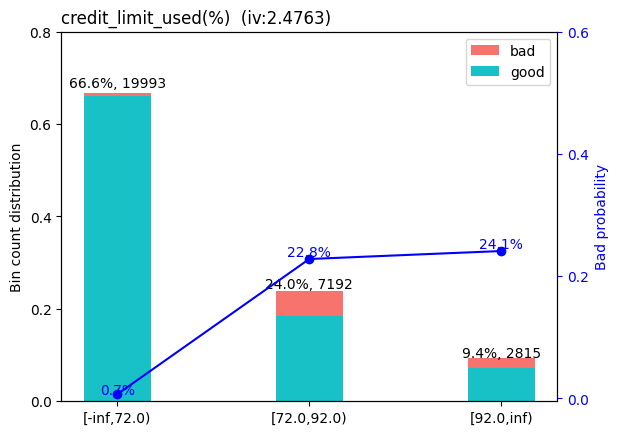

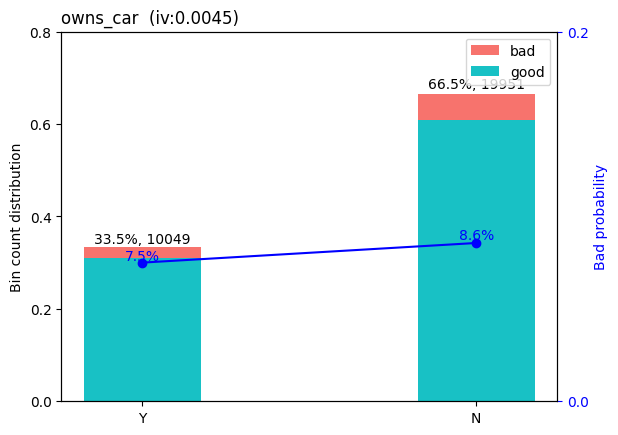

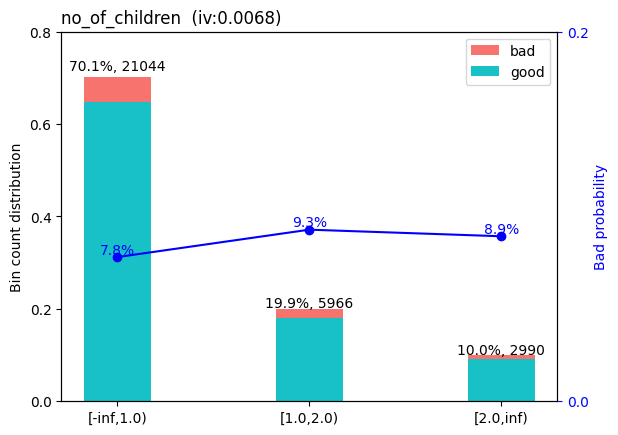

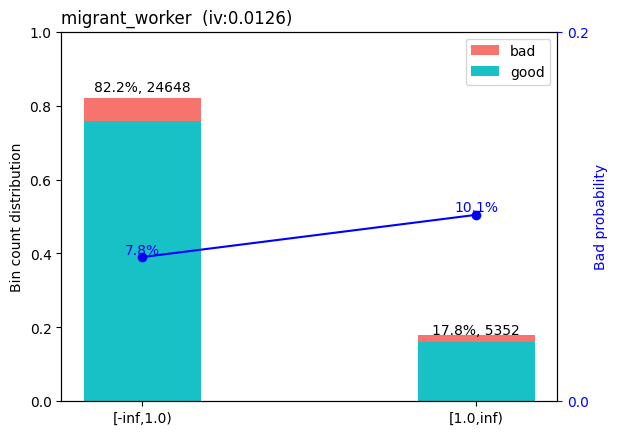

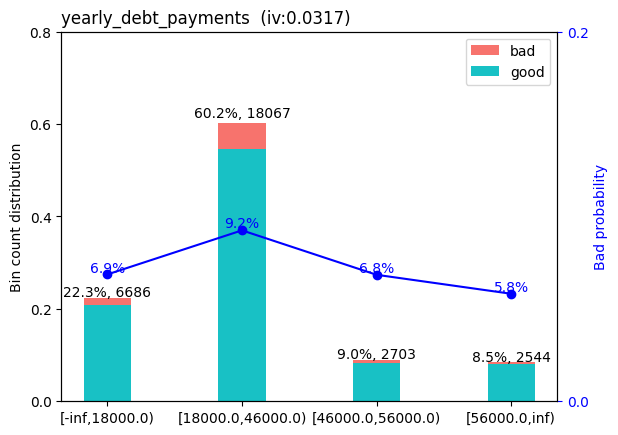

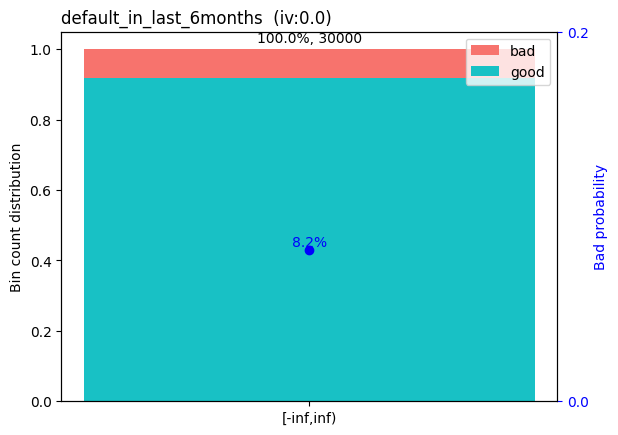

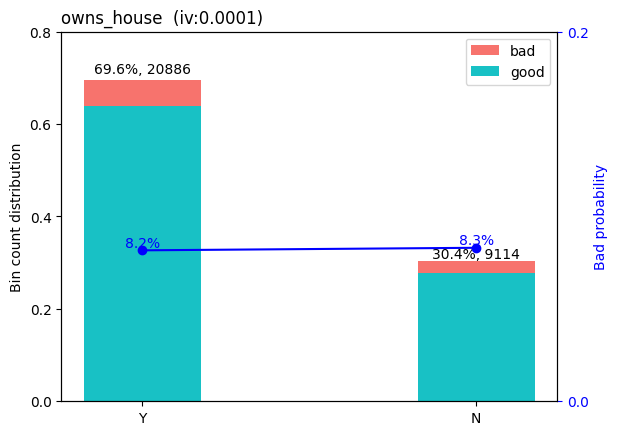

In [61]:
# woe binning ------
bins = sc.woebin(df.drop(columns = ["customer_id", "name"]), y="credit_card_default")
sc.woebin_plot(bins)

In [62]:
# converting train and test into woe values
train_woe = sc.woebin_ply(df, bins)
train_woe.drop(columns = ["customer_id", "name"], inplace = True)
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,credit_limit_woe,no_of_children_woe,prev_defaults_woe,net_yearly_income_woe,age_woe,occupation_type_woe,migrant_worker_woe,yearly_debt_payments_woe,default_in_last_6months_woe,total_family_members_woe,credit_score_woe,owns_house_woe,gender_woe,no_of_days_employed_woe,credit_limit_used(%)_woe,owns_car_woe
34126,0,0.019562,-0.055311,0.0,-0.132349,-0.004599,-0.284480,-0.055429,-0.193449,0.0,0.060765,-2.851316,-0.005566,-0.175009,-0.537050,-2.518964,0.046332
44609,0,0.019562,-0.055311,0.0,0.089601,-0.024660,-0.284480,-0.055429,0.130535,0.0,-0.071457,-2.851316,-0.005566,-0.175009,-0.537050,-2.518964,0.046332
44264,1,0.019562,-0.055311,0.0,0.089601,-0.202448,-0.284480,-0.055429,0.130535,0.0,-0.071457,0.286341,-0.005566,-0.175009,-0.537050,1.195478,0.046332
33556,0,0.019562,0.134941,0.0,0.015976,0.052665,-0.284480,-0.055429,-0.196714,0.0,0.071114,-2.851316,-0.005566,-0.175009,0.104234,-2.518964,-0.097689
28050,0,-0.148197,-0.055311,0.0,0.089601,0.044954,-0.284480,-0.055429,-0.196714,0.0,-0.071457,-2.851316,-0.005566,0.278268,-0.537050,-2.518964,-0.097689
4448,0,0.058156,0.091910,0.0,0.089601,-0.202448,0.360785,-0.055429,-0.193449,0.0,0.097436,-2.851316,-0.005566,0.278268,0.104234,-2.518964,0.046332
15054,0,-0.148197,-0.055311,0.0,0.089601,-0.024660,-0.284480,-0.055429,-0.196714,0.0,0.060765,-2.851316,0.012659,0.278268,0.104234,-2.518964,0.046332
26095,0,0.058156,0.091910,0.0,0.089601,0.052665,-0.284480,-0.055429,0.130535,0.0,0.097436,-2.851316,-0.005566,-0.175009,0.104234,-2.518964,-0.097689
2593,0,0.058156,0.134941,0.0,0.089601,0.052665,0.360785,-0.055429,0.130535,0.0,-0.071457,-2.851316,-0.005566,-0.175009,0.376652,-2.518964,0.046332
297,0,0.146722,0.134941,0.0,0.015976,-0.024660,-0.284480,-0.055429,0.130535,0.0,0.071114,-2.851316,-0.005566,-0.175009,-0.537050,-2.518964,0.046332


In [63]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

df.drop(['customer_id', 'name'], axis=1, inplace=True)
df.drop(low_IV_cols, axis=1, inplace=True)
df.head()

,gender,no_of_days_employed,occupation_type,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
34126,F,4181.0,Unknown,23,807.0,0,0
44609,F,365250.0,Unknown,60,858.0,0,0
44264,F,365241.0,Unknown,81,667.0,0,1
33556,F,1882.0,Managers,32,690.0,0,0
28050,M,365244.0,Unknown,65,721.0,0,0


## 4. Encoding

In [64]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0)
#df["owns_car"] = df["owns_car"].apply(lambda x : 1 if x == "Y" else 0)
#df["owns_house"] = df["owns_house"].apply(lambda x : 1 if x == "Y" else 0)

In [65]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation")
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,1,4181.0,23,807.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44609,1,365250.0,60,858.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44264,1,365241.0,81,667.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
33556,1,1882.0,32,690.0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
28050,0,365244.0,65,721.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## 5. Split dataset

In [66]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 24) (9000, 24)
y= (21000,) (9000,)


In [67]:
X_train.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,1,365246.0,96,922.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5389,1,1206.0,16,711.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8704,1,4040.0,18,761.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37747,0,96.0,51,854.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
27346,0,5326.0,92,700.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [68]:
y_train

26658    0
5389     0
8704     0
37747    0
27346    0
        ..
34093    0
823      0
32715    0
14006    0
21152    0
Name: credit_card_default, Length: 21000, dtype: int64

In [69]:
# WOE data
X_woe = train_woe.drop(['credit_card_default'], axis=1)
y_woe = train_woe['credit_card_default']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (21000, 16) (9000, 16)
y= (21000,) (9000,)


In [70]:
X_train_woe.head()

,credit_limit_woe,no_of_children_woe,prev_defaults_woe,net_yearly_income_woe,age_woe,occupation_type_woe,migrant_worker_woe,yearly_debt_payments_woe,default_in_last_6months_woe,total_family_members_woe,credit_score_woe,owns_house_woe,gender_woe,no_of_days_employed_woe,credit_limit_used(%)_woe,owns_car_woe
26658,0.146722,-0.055311,0.0,0.015976,0.052665,-0.284480,-0.055429,-0.193449,0.0,-0.071457,-2.851316,-0.005566,-0.175009,-0.537050,1.268081,0.046332
5389,0.058156,0.134941,0.0,-0.128576,0.044954,0.360785,0.226851,0.130535,0.0,0.071114,-2.851316,-0.005566,-0.175009,0.104234,-2.518964,0.046332
8704,0.019562,0.134941,0.0,0.089601,0.104362,-0.284480,-0.055429,-0.193449,0.0,0.071114,-2.851316,-0.005566,-0.175009,-0.537050,-2.518964,0.046332
37747,0.019562,-0.055311,0.0,0.015976,-0.123203,-0.284480,-0.055429,-0.196714,0.0,0.060765,-2.851316,-0.005566,0.278268,0.376652,-2.518964,-0.097689
27346,0.146722,-0.055311,0.0,0.089601,0.052665,0.360785,-0.055429,0.130535,0.0,-0.071457,-2.851316,0.012659,0.278268,-0.537050,1.268081,0.046332


In [71]:
y_woe

34126    0
44609    0
44264    1
33556    0
28050    0
        ..
37523    0
36228    0
32772    0
9762     0
33325    0
Name: credit_card_default, Length: 30000, dtype: int64

## 6. Scaling data

In [72]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## 5. Data imbalance handling

In [73]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE

# # Khởi tạo RandomOverSampler
# oversampler = RandomOverSampler(random_state=42)

# # Khởi tạo RandomUnderSampler
# undersampler = RandomUnderSampler(random_state=42)

# # Khởi tạo SMOTE
# smote = SMOTE(random_state=42)

# methods = {
#     "Oversampling": oversampler,
#     "Undersampling": undersampler,
#     "SMOTE": smote
# }

# for name, sampler in methods.items():
#     print("Processing", name)
#     X_train, y_train = sampler.fit_resample(X_train, y_train)
#     print("Dimension of X_resampled Shape:", X_train.shape)
#     print("Dimension of y_resampled Shape:", y_train.shape)
#     # Tiếp tục xử lý dữ liệu và in ra thông tin cần thiết cho mỗi phương pháp


### 5.1. OVERSAMPLING

In [74]:
from imblearn.over_sampling import RandomOverSampler


# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [75]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 24)
Dimension of y_train_sm Shape: (38552,)


In [76]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 24)
y_train.shape: (38552,)


,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,1.0,0.999984,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.003296,0.161616,0.469933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011055,0.181818,0.581292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000257,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014576,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
y_train.value_counts(normalize=True)

credit_card_default
0    0.5
1    0.5
Name: proportion, dtype: float64

### 5.2. UNDERSAMPLING

In [78]:
# from imblearn.under_sampling import RandomUnderSampler

# # Initialize RandomUnderSampler
# undersampler = RandomUnderSampler(random_state=42)
# X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [79]:
# print("Dimension of X_train_sm Shape:", X_train.shape)
# print("Dimension of y_train_sm Shape:", y_train.shape)

In [80]:
# X_train = pd.DataFrame(data=X_train, columns=cols)
# print("X_train.shape:",X_train.shape)
# y_train = pd.Series(y_train)
# print("y_train.shape:",y_train.shape)
# X_train.head()

In [81]:
# y_train.value_counts(normalize=True)

### 5.3. SMOTE

In [82]:
# initialize SMOTE method
# sm = SMOTE(random_state=42)
# X_train,y_train = sm.fit_resample(X_train,y_train)

In [83]:
# print("Dimension of X_train_sm Shape:", X_train.shape)
# print("Dimension of y_train_sm Shape:", y_train.shape)

In [84]:
# X_train = pd.DataFrame(data=X_train, columns=cols)
# print("X_train.shape:",X_train.shape)
# y_train = pd.Series(y_train)
# print("y_train.shape:",y_train.shape)
# X_train.head()

In [85]:
# y_train.value_counts(normalize=True)

# **Classification Models**

## 1. Logistic cho tập train 

In [86]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(y_train, X_train)
logit_fit = logit.fit()

         Current function value: 0.101133
         Iterations: 35


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     credit_card_default   No. Observations:                38552
Model:                           Logit   Df Residuals:                    38528
Method:                            MLE   Df Model:                           23
Date:                 Fri, 26 Apr 2024   Pseudo R-squ.:                  0.8541
Time:                         16:36:14   Log-Likelihood:                -3898.9
converged:                       False   LL-Null:                       -26722.
Covariance Type:             nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
gender                              -0.2426      0.070     -3.466      0.001      -0.380      -0.105
no_of_days_employed                 -0.3919      0.115     -3.419      0.001      -0.617      -0.167
credit_limit_used(%)                 9.1868      0.213     43.179      0.000       8.770       9.604
credit_score                       -24.9087      0.574    -43.431      0.000     -26.033     -23.785
default_in_last_6months              4.7130      0.864      5.457      0.000       3.020       6.406
occupation_Accountants               3.2365      0.305     10.594      0.000       2.638       3.835
occupation_Cleaning staff            4.0000      0.337     11.878      0.000       3.340       4.660
occupation_Cooking staff             3.9653      0.320     12.402      0.000       3.339       4.592
occupation_Core staff                3.5589      0.273     13.033      0.000       3.024       4.094
occupation_Drivers                   3.5484      0.269     13.171      0.000       3.020       4.076
occupation_HR staff                  2.6317      0.708      3.715      0.000       1.243       4.020
occupation_High skill tech staff     2.5648      0.307      8.348      0.000       1.963       3.167
occupation_IT staff                 -2.4414      2.090     -1.168      0.243      -6.539       1.656
occupation_Laborers                  3.5143      0.258     13.624      0.000       3.009       4.020
occupation_Low-skill Laborers        3.6522      0.386      9.453      0.000       2.895       4.409
occupation_Managers                  3.2758      0.276     11.850      0.000       2.734       3.818
occupation_Medicine staff            3.2121      0.319     10.077      0.000       2.587       3.837
occupation_Private service staff     2.7738      0.380      7.292      0.000       2.028       3.519
occupation_Realty agents             2.6934      0.654      4.121      0.000       1.412       3.974
occupation_Sales staff               3.5088      0.267     13.127      0.000       2.985       4.033
occupation_Secretaries               3.0984      0.445      6.963      0.000       2.226       3.971
occupation_Security staff            2.8573      0.330      8.653      0.000       2.210       3.504
occupation_Unknown                   3.1648      0.265     11.948      0.000       2.646       3.684
occupation_Waiters/barmen staff      4.7776      0.414     11.543      0.000       3.966       5.589
====================================================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## 2. Logistic cho tập train - dữ liệu sử dụng WOE

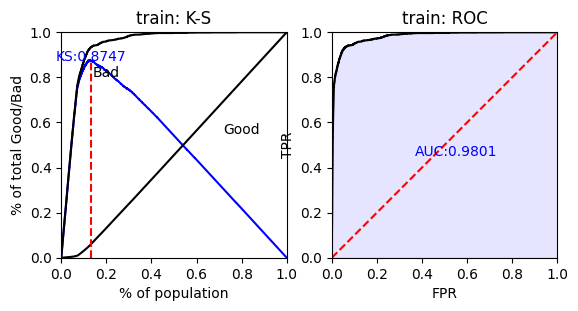

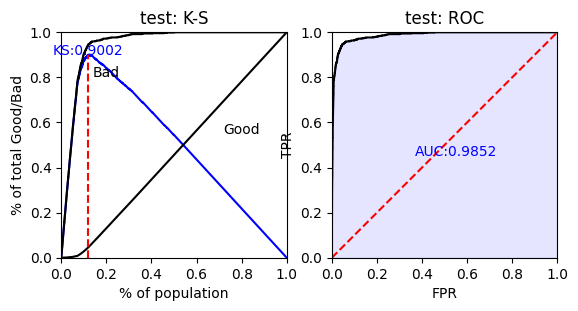

In [88]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)
# credit score
score = sc.scorecard_ply(old_df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [89]:
score

,credit_limit_points,net_yearly_income_points,age_points,occupation_type_points,migrant_worker_points,yearly_debt_payments_points,credit_score_points,gender_points,no_of_days_employed_points,credit_limit_used(%)_points,owns_car_points,score
34126,-2.0,1.0,0.0,7.0,1.0,15.0,201.0,10.0,34.0,177.0,-6.0,997.0
44609,-2.0,-1.0,1.0,7.0,1.0,-10.0,201.0,10.0,34.0,177.0,-6.0,971.0
44264,-2.0,-1.0,9.0,7.0,1.0,-10.0,-20.0,10.0,34.0,-84.0,-6.0,497.0
33556,-2.0,-0.0,-2.0,7.0,1.0,15.0,201.0,10.0,-7.0,177.0,13.0,972.0
28050,12.0,-1.0,-2.0,7.0,1.0,15.0,201.0,-15.0,34.0,177.0,13.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37523,-2.0,-1.0,1.0,7.0,1.0,-10.0,201.0,10.0,34.0,177.0,-6.0,971.0
36228,-5.0,-1.0,1.0,-9.0,1.0,-10.0,201.0,10.0,-24.0,177.0,-6.0,894.0
32772,-2.0,-0.0,0.0,-4.0,1.0,15.0,201.0,10.0,-7.0,177.0,-6.0,944.0
9762,-2.0,-1.0,1.0,-9.0,1.0,-10.0,201.0,-15.0,-24.0,177.0,-6.0,872.0


(array([ 1471.,   661.,   407.,  1201.,   447.,  5736.,  2845.,   937.,
        13188.,  3107.]),
 array([ 167. ,  257.4,  347.8,  438.2,  528.6,  619. ,  709.4,  799.8,
         890.2,  980.6, 1071. ]),
 <BarContainer object of 10 artists>)

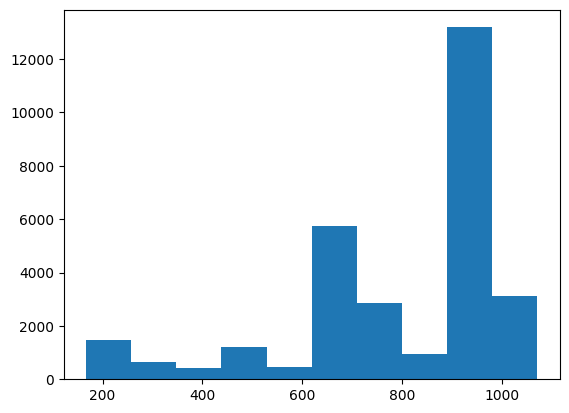

In [90]:
plt.hist(score["score"])

## Another models

In [91]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)
    
    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)
    

## Logistic Regression

In [92]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [93]:
# prediction
evaluation(logreg)

[[18229  1047]
 [  673 18603]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     19276
           1       0.95      0.97      0.96     19276

    accuracy                           0.96     38552
   macro avg       0.96      0.96      0.96     38552
weighted avg       0.96      0.96      0.96     38552

Accuracy of TRAIN data: 95.53849346337414
F1_Score of TRAIN data: 95.53807353832077
[[7795  466]
 [  18  721]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.98      0.75       739

    accuracy                           0.95      9000
   macro avg       0.80      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy of TEST data: 94.62222222222222
F1_Score of TEST data: 85.92956175817685
RMSE:  0.23190036174568116
ROC AUC score:  0.9596165624249064


## Decision Tree

In [94]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [95]:
# prediction
evaluation(tree_model)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8134  127]
 [ 109  630]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8261
           1       0.83      0.85      0.84       739

    accuracy                           0.97      9000
   macro avg       0.91      0.92      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 97.37777777777778
F1_Score of TEST data: 91.39732127813448
RMSE:  0.16193277068654827
ROC AUC score:  0.9185649707389778


## Random Forest

In [96]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [97]:
# prediction
evaluation(regr_rfr)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8143  118]
 [ 121  618]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8261
           1       0.84      0.84      0.84       739

    accuracy                           0.97      9000
   macro avg       0.91      0.91      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 97.34444444444445
F1_Score of TEST data: 91.17515833739327
RMSE:  0.16295875415440422
ROC AUC score:  0.9109906191424925


## CatBoost

In [98]:
reg_catb = CatBoostClassifier(random_seed=42)
reg_catb.fit(X_train, y_train)

Learning rate set to 0.048998
0:	learn: 0.5385257	total: 65.6ms	remaining: 1m 5s
1:	learn: 0.4485339	total: 73.3ms	remaining: 36.6s
2:	learn: 0.3772405	total: 81.1ms	remaining: 27s
3:	learn: 0.3198224	total: 88.9ms	remaining: 22.1s
4:	learn: 0.2608294	total: 99.1ms	remaining: 19.7s
5:	learn: 0.2305665	total: 107ms	remaining: 17.8s
6:	learn: 0.1914687	total: 115ms	remaining: 16.4s
7:	learn: 0.1742210	total: 123ms	remaining: 15.3s
8:	learn: 0.1505772	total: 131ms	remaining: 14.4s
9:	learn: 0.1415226	total: 137ms	remaining: 13.6s
10:	learn: 0.1268576	total: 145ms	remaining: 13.1s
11:	learn: 0.1139510	total: 153ms	remaining: 12.6s
12:	learn: 0.1048064	total: 161ms	remaining: 12.2s
13:	learn: 0.0977047	total: 169ms	remaining: 11.9s
14:	learn: 0.0917213	total: 177ms	remaining: 11.6s
15:	learn: 0.0878898	total: 189ms	remaining: 11.6s
16:	learn: 0.0853766	total: 197ms	remaining: 11.4s
17:	learn: 0.0829890	total: 206ms	remaining: 11.2s
18:	learn: 0.0811593	total: 213ms	remaining: 11s
19:	learn:

In [99]:
# prediction
evaluation(reg_catb)

[[19052   224]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.41896659057896
F1_Score of TRAIN data: 99.41894697423909
[[8038  223]
 [  65  674]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.75      0.91      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.8
F1_Score of TEST data: 90.31806356490095
RMSE:  0.17888543819998318
ROC AUC score:  0.9425244955714928


## XGBoost

In [100]:
xgb_model = XGBClassifier(random_seed=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_seed=42, ...)

In [101]:
# prediction
evaluation(xgb_model)

[[19099   177]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19276
           1       0.99      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 99.54087985059141
F1_Score of TRAIN data: 99.54087017253354
[[8082  179]
 [  89  650]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.78      0.88      0.83       739

    accuracy                           0.97      9000
   macro avg       0.89      0.93      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 97.02222222222223
F1_Score of TEST data: 90.638599646285
RMSE:  0.17256238807393046
ROC AUC score:  0.9289494517417953


In [102]:
xgb_model.feature_importances_

array([0.01482193, 0.01563294, 0.18293026, 0.5434478 , 0.        ,
       0.01024055, 0.0130176 , 0.01446967, 0.01791017, 0.01576405,
       0.00486673, 0.01701271, 0.        , 0.01609615, 0.00491271,
       0.01815308, 0.02308126, 0.01050435, 0.00097972, 0.01874975,
       0.01710636, 0.01158971, 0.01999056, 0.00872188], dtype=float32)

In [103]:
from xgboost import plot_importance

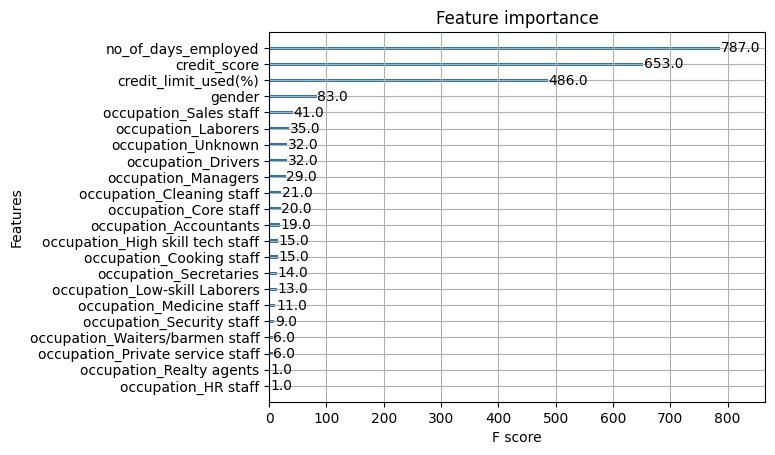

<Figure size 640x480 with 0 Axes>

In [104]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

## LightGBM

In [105]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19276, number of negative: 19276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 650
[LightGBM] [Info] Number of data points in the train set: 38552, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [106]:
# prediction
evaluation(lgbm_model)

[[18885   391]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19276
           1       0.98      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 98.98578543266238
F1_Score of TRAIN data: 98.98568109665646
[[8004  257]
 [  51  688]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.93      0.82       739

    accuracy                           0.97      9000
   macro avg       0.86      0.95      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.57777777777777
F1_Score of TEST data: 89.9112480994422
RMSE:  0.18499249234015477
ROC AUC score:  0.9499388931377674
